# Week 1: Day 2 AM // Classification Concepts

# A. Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# B. MNIST

For today task, we will be using a dataset called **MNIST**. 

* MNIST is a dataset that contains 70,000 images of handwritten digits.
* This dataset already splitted to **training set (60,000 images)** and **testing set (10,000 images)** where each of image belongs to a specific number (class). 
* The classes/labels are numbers between **0 and 9**.
* Each of image is contains **28 * 28 pixels**.
* Each of image is **black-and-white** image where each pixel contains number between 0-255.
* Sample of dataset : [MNIST sample](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png).
* For more details, please visit : [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database) or [Yann Le Cun's Website](/http://yann.lecun.com/exdb/mnist/).

---
## Fetch MNIST

To get this dataset, we can use package/modul Scikit-Learn.

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [ ]:
%%time
# Fetch MNIST Dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print('Keys: ', mnist.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
CPU times: user 22.6 s, sys: 517 ms, total: 23.1 s
Wall time: 23.3 s


In [ ]:
# Get All Data and All Labels

X, y = mnist["data"], mnist["target"]

print('Total Data   : ', X.shape)
print('Total Labels : ', y.shape)

Total Data   :  (70000, 784)
Total Labels :  (70000,)


Saving figure some_digit_plot


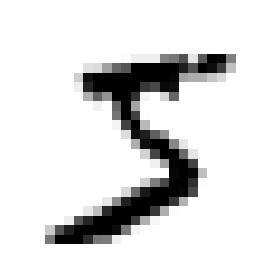

In [ ]:
# Visualization of First Data

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [ ]:
# Display Value in First Data

print('First Data - Value')
print(X[0])
print('First Data - Type  : ', type(X[0]))
print('First Data - Shape : ', X[0].shape)

First Data - Value
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   

In [ ]:
# Display Target Class for First Data

print('First Data - Target      : ', y[0])
print('First Data - Target Type : ', type(y[0]))

First Data - Target      :  5
First Data - Target Type :  <class 'str'>


As you can see, the target class is in `string` type. We will convert it to numeric for better process.

In [ ]:
# Convert Str to Int for Target Labels

y = y.astype(np.uint8)

---
## Explore Dataset

Let's explore a bit more about our dataset.

In [ ]:
# Function for Visualize A Specific Image (One Image Only)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
# Function for Visualize A Group of Images
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


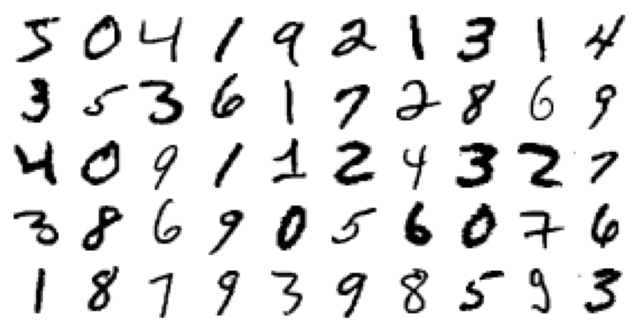

In [ ]:
# Visualization of the First 50 Images

plt.figure(figsize=(9,9))
example_images = X[:50]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [ ]:
# Display the First 10 Target Labels

y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

---
## Splitting Data

Before we create a model, make sure that at least two types of data are available, namely train data and test data.

* Data train is any kind of data that aims to create a model. This data should be as clean as possible. Therefore, a process called data cleaning will only occur in this data, such as handling missing values, outliers, handling cardinality, features scaling, etc.
* Test data is any kind of data that are not included in the training process. The purpose of this data is to check the performance of the newly created model. The better the model, the more resistant it is to all kinds of data that it has never seen.

Notes of MNIST Dataset : 

* There are many ways to get the MNIST dataset. 
* You can download directly from Kaggle, [Yan Le Cun's website](https://http://yann.lecun.com/exdb/mnist/), Scikit-Learn module, etc. 
* As previously mentioned, this dataset should have been divided into two, training data and testing data. 
* *However, if you get it using Scikit-Learn module, you will have to divide this dataset into train data and test data manually.*

In [ ]:
# Split MNIST into Train Data and Test Data Manually
 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# C. Binary Classification

## Problem Definition

Binary Classification is a Multiclass Classification where all possible target classes is just 2 categories. 

* Because, MNIST dataset has 10 different target classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), we will be converting some targets to other targets. 
* Let's say we will predict **which image is number 5 and which isn't**.
* The new target labels will contains 
  * `True` : If the old target labels is 5.
  * `False` : If the old target labels isn't 5.

In [ ]:
# Converting Target Labels into New Target Labels

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
# Display the First 10 Target Labels, both from Old Target Labels and from New Target Labels

print('Old Target Labels : ', y_train[:10])
print('New Target Labels : ', y_train_5[:10])

Old Target Labels :  [5 0 4 1 9 2 1 3 1 4]
New Target Labels :  [ True False False False False False False False False False]


---
## Train with Stochastic Gradient Descent

Let's predict this train set using an algorithm called **Stochastic Gradient Descent**. We will learn about Stochastic Gradient Descent in P1W1D2PM.

In [ ]:
# Train a Model with Stochastic Gradient Descent

%%time 
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

CPU times: user 23.8 s, sys: 32.3 ms, total: 23.9 s
Wall time: 23.9 s


Prediction :  [ True]

Visualization of a Test Data


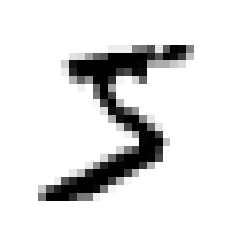

In [ ]:
# Predict a Data

prediction = sgd_clf.predict([some_digit])

print('Prediction : ', prediction)
print('\nVisualization of a Test Data')
plot_digit(some_digit)

In [ ]:
# Predict All Train Data

from sklearn.metrics import accuracy_score

predictions_train = sgd_clf.predict(X_train)
acc_train = accuracy_score(y_train_5, predictions_train)

print('Prediction        : ', predictions_train)
print('Accuracy - Train  : ', acc_train)

Prediction        :  [ True False False ...  True False False]
Accuracy - Train  :  0.9522666666666667


As you can see above, with SGD classifier, we can achieve accuracy 95.23 % in just few steps.

---
## Cross Validation

In the previous section, we have seen the accuracy we get more than 95%. Wow! Then, how can we be sure that this accuracy is valid? One way to ensure this is to use Cross Validation.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset. Cross-validation provides performance measurements such as mean and standard deviation.
* Mean : **how well** the procedure performs on average.
* Standard deviation : **how much** the procedure is expected to vary in practice.

Mean and standard deviation can be used to give a confidence interval on the expected performance on a machine learning procedure in practice.



In [ ]:
# Predict All Train Data using Cross Validation Method

%%time 
from sklearn.model_selection import cross_val_score

acc_train_cross_val = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print('Accuracy - All - Cross Validation  : ', acc_train_cross_val)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val.std())

Accuracy - All - Cross Validation  :  [0.95035 0.96035 0.9604 ]
Accuracy - Mean - Cross Validation :  0.9570333333333334
Accuracy - Std - Cross Validation  :  0.004725874404688398
CPU times: user 32.3 s, sys: 308 ms, total: 32.6 s
Wall time: 32.3 s


---
## Stratified K-Fold Cross Validation

Stratified K-Fold Cross-validation used same method as cross-validation above. The difference is each fold contains approximately the same percentage of samples of each target class as the complete set. 

In [ ]:
# Predict All Train Data using Stratified K-Fold Method

%%time

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

total_folds = 3
skfolds = StratifiedKFold(n_splits=total_folds, shuffle=True, random_state=42)
acc_train_stratkfold = []
loop = 0

for train_index, test_index in skfolds.split(X_train, y_train_5):
  loop += 1
  clone_clf = clone(sgd_clf)
  
  X_train_folds = X_train[train_index]
  y_train_folds = np.array(y_train_5)[train_index]
  
  X_test_fold = X_train[test_index]
  y_test_fold = np.array(y_train_5)[test_index]
  
  print('Loop : ', loop)
  print('Total train - `five`          : ', sum([1 if x else 0 for x in y_train_folds]))
  print('Total train - `not_five`      : ', sum([0 if x else 1 for x in y_train_folds]))
  print('Total validation - `five`     : ', sum([1 if not x else 0 for x in y_test_fold]))
  print('Total validation - `not_five` : ', sum([0 if not x else 1 for x in y_test_fold]))
  print('')
  
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  acc_train_stratkfold.append(n_correct / len(y_pred))

acc_train_stratkfold = np.array(acc_train_stratkfold)

print('Accuracy - Train : ', acc_train)
print('Accuracy - Train - Mean - Cross Validation  : ', acc_train_cross_val.mean())
print('Accuracy - Train - Mean - Stratified K-Fold : ', np.mean(acc_train_stratkfold))
print('\nAccuracy - Train - Std - Cross Validation   : ', acc_train_cross_val.std())
print('Accuracy - Train - Std - Stratified K-Fold  : ', np.std(acc_train_stratkfold))
print('\nAccuracy - Train - All - Cross Validation   : ', acc_train_cross_val)
print('Accuracy - Train - All - Stratified K-Fold  : ', acc_train_stratkfold)

Loop :  1
Total train - `five`          :  3614
Total train - `not_five`      :  36386
Total validation - `five`     :  18193
Total validation - `not_five` :  1807

Loop :  2
Total train - `five`          :  3614
Total train - `not_five`      :  36386
Total validation - `five`     :  18193
Total validation - `not_five` :  1807

Loop :  3
Total train - `five`          :  3614
Total train - `not_five`      :  36386
Total validation - `five`     :  18193
Total validation - `not_five` :  1807

Accuracy - Train :  0.9522666666666667
Accuracy - Train - Mean - Cross Validation  :  0.9570333333333334
Accuracy - Train - Mean - Stratified K-Fold :  0.9503333333333334

Accuracy - Train - Std - Cross Validation   :  0.004725874404688398
Accuracy - Train - Std - Stratified K-Fold  :  0.024103676529156744

Accuracy - Train - All - Cross Validation   :  [0.95035 0.96035 0.9604 ]
Accuracy - Train - All - Stratified K-Fold  :  [0.9669  0.91625 0.96785]
CPU times: user 38.7 s, sys: 414 ms, total: 39.1 s

In [ ]:
# Let's Testing Our Model

from sklearn.metrics import accuracy_score

predictions_test = sgd_clf.predict(X_test)
acc_test = accuracy_score(y_test_5, predictions_test)

print('Accuracy - Test : ', acc_test)

Accuracy - Test :  0.9492


So, as we can see, the accuracy test above is **still in range of standard deviation** from cross-validation, regardless using traditional cross-validation or using stratified k-fold cross-validation.

---
## Performance Evaluation (Accuracy)

In [ ]:
# Check Predictions using Confusion Matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_5, predictions_train))
print('')

tn, fp, fn, tp = confusion_matrix(y_train_5, predictions_train).ravel()
print('True Negative  : ', tn)
print('False Positive : ', fp)
print('False Negative : ', fn)
print('True Positive  : ', tp)

[[52316  2263]
 [  601  4820]]

True Negative  :  52316
False Positive :  2263
False Negative :  601
True Positive  :  4820


From above results, can be seen as :

|  | Predicted - False (Not Five) | Predicted - True (Five) |
| --- | ----------- | ----------- |
| Actual - False (Not Five) | True Negative = 52316 | False Positive = 2263 |
| Actual - True (Five) | False Negative = 601 | True Positive = 4820 |

The above table is confusion matrix where accuracy for train is **95.23%**. But, what if confusion matrix looks like if accuracy is 100%? Let's explore !

In [ ]:
# Let's Pretend We Reached Perfection. It means the prediction results is equal to all target labels in data train
y_train_perfect_predictions = y_train_5

# Let's Check the Content of Confution Matrix
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Confusion matrix where accuracy is 100% can seen as :

|  | Predicted - False (Not Five) | Predicted - True (Five) |
| --- | ----------- | ----------- |
| Actual - False (Not Five) | True Negative = 54579 | False Positive = 0 |
| Actual - True (Five) | False Negative = 0 | True Positive = 5421 |

---
## Precision and Recall

Accuracy metrics are **not suitable for imbalanced datasets**. Imbalanced datasets are datasets in which one or many categories are too small compared to other categories. 

In our case prediction (`5` or `not 5`), you can see 5421 images labelled `True` (`5`) and 54579 images labelled `False` (`not 5`). It means label `True` (`5`) only 9.93% from label `False` (`not 5`).

In [ ]:
# Calculate Precision and Recall


# Using Confusion Matrix
cm = confusion_matrix(y_train_5, predictions_train)
print('Calculate Precision and Recall using Confusion Matrix')
print('Precision : ', cm[1, 1] / (cm[0, 1] + cm[1, 1]))
print('Recall    : ', cm[1, 1] / (cm[1, 0] + cm[1, 1]))
print('')

# Using a Module from Scikit-Learn
from sklearn.metrics import precision_score, recall_score
print('Calculate Precision and Recall using a Module from Scikit-Learn')
print('Precition : ', precision_score(y_train_5, predictions_train))
print('Recall    : ', recall_score(y_train_5, predictions_train))

Calculate Precision and Recall using Confusion Matrix
Precision :  0.6805026118876183
Recall    :  0.8891348459693783

Calculate Precision and Recall using a Module from Scikit-Learn
Precition :  0.6805026118876183
Recall    :  0.8891348459693783


Precision and Recall can be combined into a single value called the **F1-Score**. This is our score/accuracy that explains how good the model is.

In [ ]:
# Calculate F1-Score

# Using Confusion Matrix
cm = confusion_matrix(y_train_5, predictions_train)
print('Calculate F1-Score using Confusion Matrix')
print('Precision : ', cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2))
print('')

# Using a Module from Scikit-Learn
from sklearn.metrics import f1_score
print('Calculate F1-Score using Confusion Matrix')
print('F1-Score : ', f1_score(y_train_5, predictions_train))

Calculate F1-Score using Confusion Matrix
Precision :  0.7709532949456174

Calculate F1-Score using Confusion Matrix
F1-Score :  0.7709532949456175


---
## SGD Decision Function

Each algorithm in Machine Learning or Deep Learning, has a value that represents how confident the model classifies data into a class. This value is known as threshold.

* This value has a different names for each algorithm such as Probability Score, Confidence Score, Confidence Level, etc. For SGD algorithm, this value is called the **Decision Function**.
* This value can be a scalar value (-∞ to ∞) or it can be a probability. For SGD, it uses **scalar values** while other algorithms like Decision Tree, Random Forest, ANN, etc., use probability.
* Threshold is used as the lower limit that will determine whether a predicted data belongs to a particular class or not. In our case,
  * If the score (Decision Function) is **higher than threshold**, that data will classified as `True` or `5`.
  * If the score (Decision Function) is **lower than threshold**, that data will classified as `False` or `not 5`.

Visualization of a Test Data


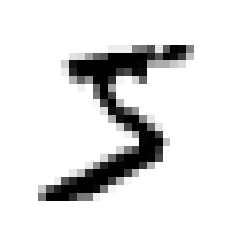

In [ ]:
# Visualize a Test Data

print('Visualization of a Test Data')
plot_digit(some_digit)

In [ ]:
# Display Decision Function

y_scores = sgd_clf.decision_function([some_digit])
print('Decision Function : ', y_scores)

Decision Function :  [2164.22030239]


In [ ]:
# Display Threshold Effect

# Effect if Threshold is 0
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print('Threshold = 0')
print('y_some_digit_pred : ', y_some_digit_pred)
print('')

# Effect if Threshold is 8000
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print('Threshold = 8000')
print('y_some_digit_pred : ', y_some_digit_pred)

Threshold = 0
y_some_digit_pred :  [ True]

Threshold = 8000
y_some_digit_pred :  [False]


---
## Precision Recall Curve

Precision Recall Curve will show effect of different threshold against precision score and recall score.

In [ ]:
# Get Precision Score and Recall Score from Different Threshold

%%time

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores = sgd_clf.decision_function(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

CPU times: user 125 ms, sys: 17 ms, total: 142 ms
Wall time: 95.1 ms


Recall when Precision == 0.9    :  0.7061427780852241
Threshold when Precision == 0.9 :  2123.562046995017

Saving figure precision_recall_vs_threshold_plot


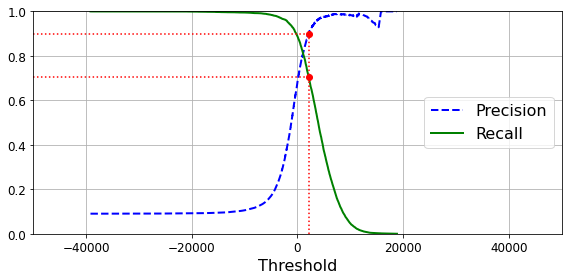

In [ ]:
# What is the Value of the Recall Score and Threshold if Precision Score is 0.9

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

print('Recall when Precision == 0.9    : ', recall_90_precision)
print('Threshold when Precision == 0.9 : ', threshold_90_precision)
print('')

# Display Precision and Recall Curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                             
    plt.axis([-50000, 50000, 0, 1])            

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In the above plot, the vertical red-dot-line shows threshold that has 0.9 precision. As we expected, when the precision score is high, recall score is low. 

Saving figure precision_vs_recall_plot


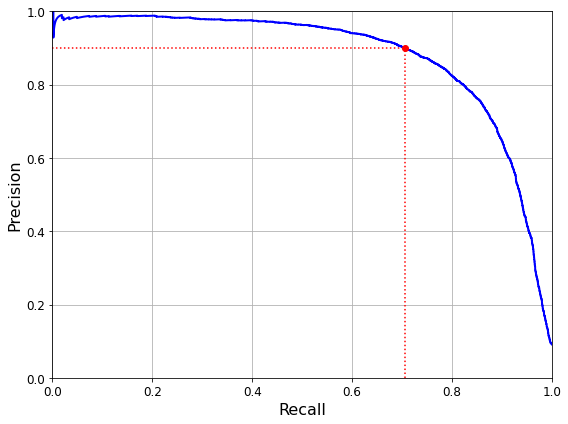

In [ ]:
# Merge Precision Score and Recall Score into One Graphic

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

---
## Get Specific Threshold

What if we want to know the value of Decision Function that has 80% (0.80) precision score? 

In [ ]:
# Get the Threshold

threshold_80_precision = thresholds[np.argmax(precisions >= 0.80)]
print('Threshold when Precision = 0.90 : ', threshold_80_precision)

Threshold when Precision = 0.90 :  941.8340516168151


In [ ]:
# Let's Check Our New Threshold

y_train_pred_80 = (y_scores >= threshold_80_precision)
precision_score_sgd = precision_score(y_train_5, y_train_pred_80)
recall_score_sgd = recall_score(y_train_5, y_train_pred_80)
print('Precision Score : ', precision_score_sgd)
print('Recall Score    : ', recall_score_sgd)

Precision Score :  0.8000717875089735
Recall Score    :  0.8223574986164914


---
## ROC curves

ROC curve is used for visual comparison of classification models which shows the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)**. 

**The area under the ROC curve is a measure of the accuracy of the model.** When a model is closer to the diagonal, it is less accurate and the model with perfect accuracy will have an area of 1.0

In [ ]:
# Get FPR, TPR, and Threshold

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


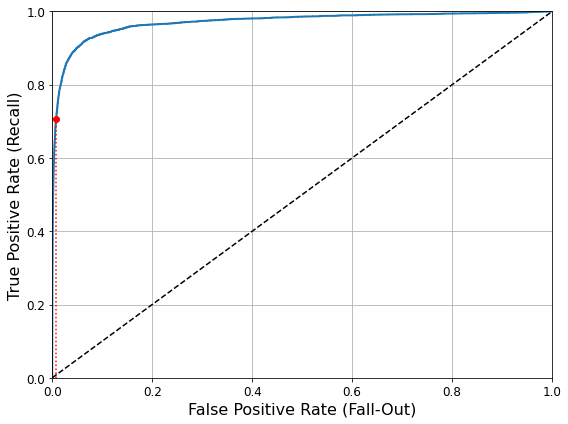

In [ ]:
# Display ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")               
save_fig("roc_curve_plot")                                    
plt.show()

Notes : In the previous section, we get that if precision = 90%, then recall = 70.61%. The red-dot in above graph is value of recall when precision is 90%.

In [ ]:
# Get ROC-AUC Score

from sklearn.metrics import roc_auc_score

roc_auc_score_sgd = roc_auc_score(y_train_5, y_scores)
print(roc_auc_score_sgd)

0.9709618248430906


With SGD, we get that ROC-AUC Score is 0.971 or 97.1%.

---
Let's check ROC curve and ROC-AUC score using different algorithm. Let's using Random Forest.

**Note**: we set `n_estimators=100` to be future-proof since this will be the default value in Scikit-Learn 0.22.

Saving figure roc_curve_comparison_plot


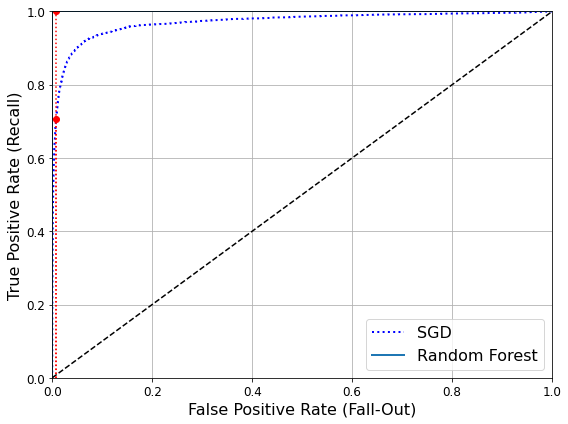

CPU times: user 38.3 s, sys: 190 ms, total: 38.5 s
Wall time: 38.3 s


In [ ]:
%%time
# Train Model using Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train_5)
y_probas_forest = forest_clf.predict_proba(X_train)

# Get FPR, TPR, and Threshold
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Display ROC Curve
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
%%time
# Get ROC-AUC Score, Precision Score, and Recall Score

roc_auc_score_forest = roc_auc_score(y_train_5, y_scores_forest)

y_train_pred_forest = forest_clf.predict(X_train)
precision_score_forest = precision_score(y_train_5, y_train_pred_forest)
recall_score_forest = recall_score(y_train_5, y_train_pred_forest)

CPU times: user 1.68 s, sys: 9.97 ms, total: 1.69 s
Wall time: 1.69 s


In [ ]:
print('SGD')
print('Precision Score : ', precision_score_sgd)
print('Recall Score    : ', recall_score_sgd)
print('ROC-AUC Score   : ', roc_auc_score_sgd) 
print('')

print('Random Forest')
print('Precision Score : ', precision_score_forest)
print('Recall Score    : ', recall_score_forest)
print('ROC-AUC Score   : ', roc_auc_score_forest) 

SGD
Precision Score :  0.8000717875089735
Recall Score    :  0.8223574986164914
ROC-AUC Score   :  0.9709618248430906

Random Forest
Precision Score :  1.0
Recall Score    :  1.0
ROC-AUC Score   :  1.0


# D. Multiclass Classification

In the previous section, we have created a model that can classify whether an image is a number 5 or not. In this section, we will see how to create a model that can classify all classes of numbers.

## SVM (Support Vector Machine)

Result SVM :  [5]
CPU times: user 2.32 s, sys: 9.74 ms, total: 2.33 s
Wall time: 2.34 s


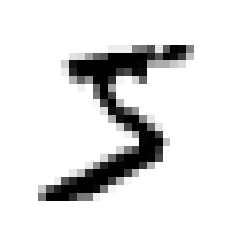

In [ ]:
# Create A Model with Support Vector Machine (SVM)
%%time
from sklearn.svm import SVC

# Model Initialization
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5

# Predict A Data
result_svm = svm_clf.predict([some_digit])

# Display Result of Prediction
plot_digit(some_digit)
print('Result SVM : ', result_svm)

In [ ]:
# Let's See The Decision Function

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [ ]:
# Get All Classes

svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Find Predicted Class by using Maximum Value of Decision Function

np.argmax(some_digit_scores)

5

---
## SGD Classifier in Multiclass Classification

Let's try this multiclass problem with our previous algorithm, Stochastic Gradient Descent. 

Result SGD :  [3]
CPU times: user 3min 13s, sys: 207 ms, total: 3min 14s
Wall time: 3min 13s


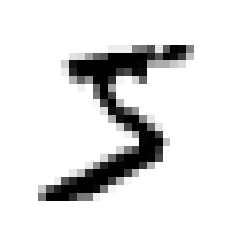

In [ ]:
# Create A Model with SGD
%%time 
from sklearn.linear_model import SGDClassifier

# Model Initialization
sgd_clf_multiclass = SGDClassifier(random_state=42)
sgd_clf_multiclass.fit(X_train, y_train)

# Predict A Data
result_sgd = sgd_clf_multiclass.predict([some_digit])

# Display Result of Prediction
plot_digit(some_digit)
print('Result SGD : ', result_sgd)

In [ ]:
# Let's See The Decision Function

some_digit_score_sgd = sgd_clf_multiclass.decision_function([some_digit])
print('Score     : ', some_digit_score_sgd.T)
print('Max Score : ', np.max(some_digit_score_sgd))
print('Class     : ', sgd_clf_multiclass.predict([some_digit]))

Score     :  [[-31893.03095419]
 [-34419.69069632]
 [ -9530.63950739]
 [  1823.73154031]
 [-22320.14822878]
 [ -1385.80478895]
 [-26188.91070951]
 [-16147.51323997]
 [ -4604.35491274]
 [-12050.767298  ]]
Max Score :  1823.7315403079076
Class     :  [3]


In [ ]:
# Calculate Precision, Recall, and F1 Score
from sklearn.metrics import classification_report

predictions_sgd_multiclass = sgd_clf_multiclass.predict(X_train)
report = classification_report(y_train, 
                               predictions_sgd_multiclass)

print(report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.94      5923
           1       0.98      0.96      0.97      6742
           2       0.93      0.82      0.88      5958
           3       0.78      0.92      0.85      6131
           4       0.96      0.80      0.87      5842
           5       0.86      0.80      0.83      5421
           6       0.97      0.91      0.94      5918
           7       0.95      0.91      0.92      6265
           8       0.67      0.90      0.77      5851
           9       0.83      0.87      0.85      5949

    accuracy                           0.88     60000
   macro avg       0.89      0.88      0.88     60000
weighted avg       0.89      0.88      0.88     60000



# E. Multilabel classification

Let's create model to handle multilabel. Suppose we will do a classification where we will predict whether :
* An image is an image with **more than 7**, and 
* An image is an **odd number** or not

Saving figure more_digits_plot


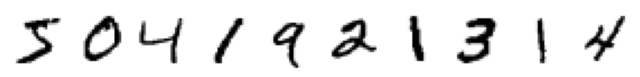

[[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]]


In [ ]:
# Create Dataset of Multilabel

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# Visualization of the First 10 Images
plt.figure(figsize=(9,9))
example_images = X[:10]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

# Display Target Labels for 10 First Images
print(y_multilabel[:10])

In [ ]:
# Create A Model with Multilabel
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

CPU times: user 20.5 s, sys: 94.2 ms, total: 20.6 s
Wall time: 20.5 s


Result SGD :  [[False  True]]


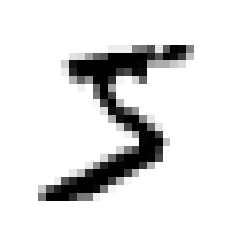

In [ ]:
# Predict A Data
result_knn = knn_clf.predict([some_digit])

# Display Result of Prediction
plot_digit(some_digit)
print('Result SGD : ', result_knn)